# Back Propagation

- Write a simple neural networks without framework (e.g. Tensorflow, PyTorch)
- Only use Numpy and other standard lib
- NN with two hidden layers
- Plot your comparison figure that show the predict result and ground truth

## Implementation

- x1,x2 : NN inputs
- y : NN output
- L($\theta$) : Lost function
- W : weight matrix
- $\sigma$ : activation function $\frac{1}{1+e^{-x}}$

In [1]:
%run lab1.py

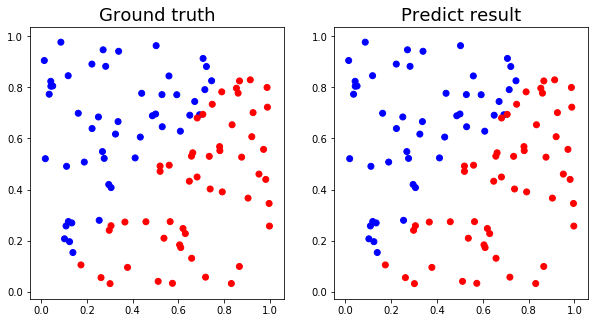

In [4]:
x, y = generate_linear()
show_result(x, y, y)

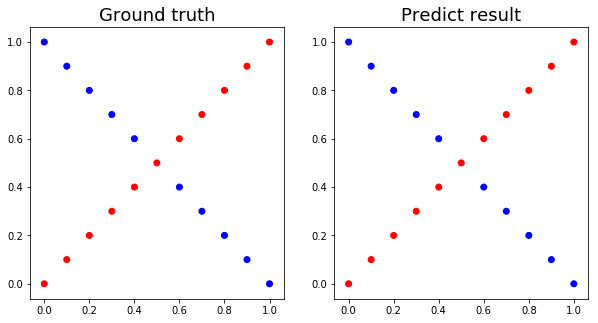

In [3]:
x, y = generate_XOR_easy()
show_result(x, y, y)

In [5]:
nn = NN([2,4,4,1], 0.01)

In [6]:
epoch_count = 10000
epoch_size = 1000
batch_size = 1000
loss_threshold = 0.01
loss_stop = False
x, y = generate_XOR_easy(int(epoch_size/2)+1)
for i in range(epoch_count):
    loss_total = 0
    n = int(epoch_size / batch_size)
    for j in range(n):
        cur_x = x[j*batch_size:(j+1)*batch_size]
        cur_y = y[j*batch_size:(j+1)*batch_size]
        pred_y = nn.forward(cur_x)
        
        l = loss(pred_y , cur_y)
        loss_total += l
        
        nn.backward(derivative_loss(pred_y, cur_y))
        nn.update()
    
    if loss_total < loss_threshold:
        loss_stop = True
    if i%1000 == 0 or loss_stop:
        print('[{:6d}] loss : {}'.format(i, loss_total))        
    if loss_stop:
        break

[     0] loss : 0.422967693888988
[  1000] loss : 0.25025492185837267
[  2000] loss : 0.25000930643667446
[  3000] loss : 0.25000898692686596
[  4000] loss : 0.25000868029861484
[  5000] loss : 0.2500083739110874
[  6000] loss : 0.25000806775591156
[  7000] loss : 0.2500077618253768
[  8000] loss : 0.2500074561117843
[  9000] loss : 0.250007150607447


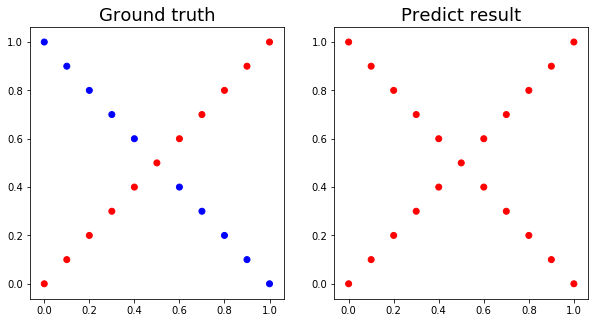

0.24997611003931935


In [7]:
x, y = generate_XOR_easy(10+1)
pred_y = nn.forward(x)
show_result(x, y, np.round(pred_y))
print(loss(pred_y, y))